<a href="https://colab.research.google.com/github/hmyrcmn/FaceMaskDetectionYolo/blob/main/HairnetDetectionYolov8TRUE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!nvidia-smi

Thu Oct 26 13:10:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
import os
HOME=os.getcwd()
HOME

'/content'

In [10]:
import zipfile

zip_file_path = "/content/Hairnet Detection 12-7.v1i.yolov8.zip"  # ZIP dosyasının yolunu ayarlayın
extraction_path = "/content/HairnetDetection"  # Çıkartılacak dizin yolunu ayarlayın

# ZIP dosyasını çıkartın
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


In [11]:
!pip install ultralytics
# IPython'dan display modülünü içe aktarın
from IPython import display

# IPython çıktılarını temizleyin
display.clear_output()

# YOLOv8 modelini kontrol etmek için komutu çalıştırın
#!yolo mode=train

!yolo mode=checks



Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 392, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [12]:
from ultralytics import YOLO
from IPython.display import display,Image

In [13]:
%cd {HOME}

!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="/content/HairnetDetection/train/images/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-0_jpg.rf.f836e042dd0c4d1d73b09f5b8876d1cf.jpg"


/content
100% 6.23M/6.23M [00:00<00:00, 100MB/s]
Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/HairnetDetection/train/images/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-0_jpg.rf.f836e042dd0c4d1d73b09f5b8876d1cf.jpg: 640x640 1 person, 2 chairs, 1 keyboard, 9.2ms
Speed: 4.2ms preprocess, 9.2ms inference, 17.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [14]:
# /content/data
if os.path.isfile("/content/Result2/"):
    print("Dosya mevcut! (There is folder!)")
else:
    os.mkdir("/content/Result2/")

%cd /content/Result/

# YoloV8 modeli 50 adımlık eğitimi yapıyorum(I am doing YoloV8 model 50 step training)
# data = "Path to the file with .yaml extension(Oluşturduğunum .yaml uzantılı dosyanın yolu)"
# epochs = How many steps will you train?(Kaç adımlı eğitim yapacağınız)
# imagsz = This is size of image at the training data(Eğitim verilerindeki resimlerin boyutu)
!yolo train model=yolov8n.pt data= /content/HairnetDetection/data.yaml epochs=50 imgsz=640

[Errno 2] No such file or directory: '/content/Result/'
/content
Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/HairnetDetection/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=N

In [19]:
from PIL import Image

img = Image.open("/content/runs/detect/train/results.png")
img.show()


In [23]:
!yolo predict model=/content/runs/detect/train/weights/best.pt source='/content/HairnetDetection/test/images'

Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/24 /content/HairnetDetection/test/images/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-11_jpg.rf.11416eb473bfdd9858df51e64a42d50e.jpg: 640x640 1 with_hairnet, 9.7ms
image 2/24 /content/HairnetDetection/test/images/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-12_jpg.rf.18cdb5724b456d2891fda91efefa7a81.jpg: 640x640 1 with_hairnet, 9.1ms
image 3/24 /content/HairnetDetection/test/images/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-24_jpg.rf.ac9011a79ab7ad9c528aa45286169213.jpg: 640x640 1 with_hairnet, 8.9ms
image 4/24 /content/HairnetDetection/test/images/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-40_jpg.rf.4de64b002549681f76423cc976eaeceb.jpg: 640x640 1 with_hairnet, 7.2ms
image 5/24 /content/HairnetDetection/test/images/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-47_jpg.rf.dc8f60b9754816746e617489609e095d.jpg: 64

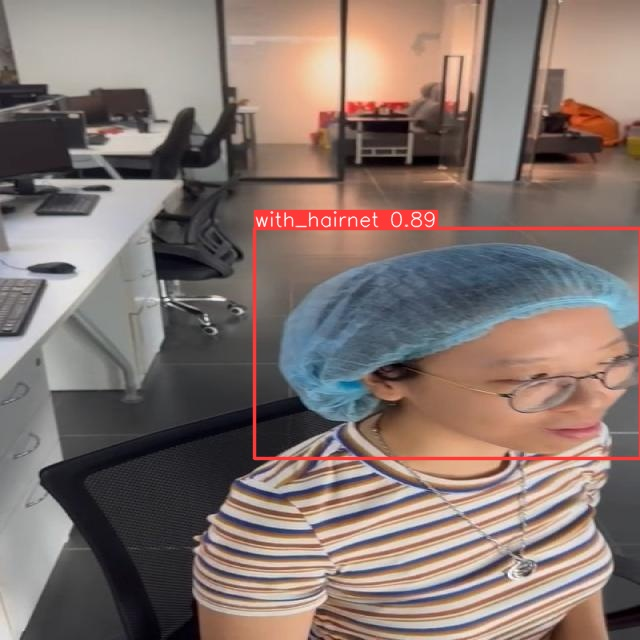

In [24]:
Image.open('/content/runs/detect/predict2/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-11_jpg.rf.11416eb473bfdd9858df51e64a42d50e.jpg')

In [25]:
import cv2

video_path = '/content/hairnetİnput.mp4'
cap = cv2.VideoCapture(video_path)


In [29]:
%cd /content/Result2
!yolo predict model=/content/runs/detect/train/weights/best.pt source='/content/hairnetİnput.mp4'


/content/Result2
Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/310) /content/hairnetİnput.mp4: 384x640 1 with_hairnet, 85.6ms
video 1/1 (2/310) /content/hairnetİnput.mp4: 384x640 1 with_hairnet, 6.9ms
video 1/1 (3/310) /content/hairnetİnput.mp4: 384x640 1 with_hairnet, 7.0ms
video 1/1 (4/310) /content/hairnetİnput.mp4: 384x640 1 with_hairnet, 5.7ms
video 1/1 (5/310) /content/hairnetİnput.mp4: 384x640 1 with_hairnet, 5.8ms
video 1/1 (6/310) /content/hairnetİnput.mp4: 384x640 1 with_hairnet, 5.7ms
video 1/1 (7/310) /content/hairnetİnput.mp4: 384x640 1 with_hairnet, 9.3ms
video 1/1 (8/310) /content/hairnetİnput.mp4: 384x640 1 with_hairnet, 5.8ms
video 1/1 (9/310) /content/hairnetİnput.mp4: 384x640 1 with_hairnet, 6.2ms
video 1/1 (10/310) /content/hairnetİnput.mp4: 384x640 (no detections), 5.8ms
video 1/1 (11/310) /content/hairnetİnput.mp4: 384x640 (no dete

In [31]:
# Gerekli kütüphaneyi yükleyin
!apt-get install ffmpeg

# AVI dosyasını MP4 formatına dönüştürün
!ffmpeg -i /content/Result2/runs/detect/predict/hairnetİnput.avi output.mp4


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq -

In [32]:
from google.colab import files

files.download('output.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>